## Рудзинский В. В. ИУ5-63Б. РК1 по ТМО

Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, LabelEncoder

In [4]:
data = pd.read_csv('marvel-wikia-data.csv')

In [5]:
#первые 5 строк
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [6]:
#типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [7]:
#размер датасета
data.shape

(16376, 13)

In [8]:
# Статистика датасета
data.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [9]:
data["APPEARANCES"]

0        4043.0
1        3360.0
2        3061.0
3        2961.0
4        2258.0
          ...  
16371       NaN
16372       NaN
16373       NaN
16374       NaN
16375       NaN
Name: APPEARANCES, Length: 16376, dtype: float64

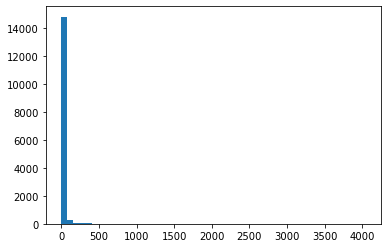

In [10]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['APPEARANCES']])
plt.hist(data['APPEARANCES'], 50)
plt.show()

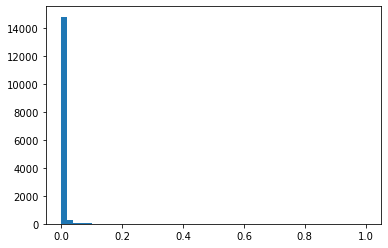

In [11]:
plt.hist(sc1_data, 50)
plt.show()

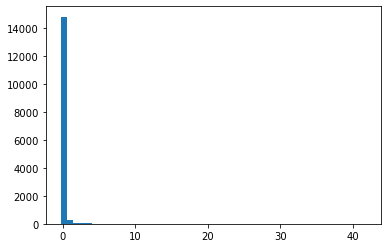

In [12]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['APPEARANCES']])
plt.hist(sc2_data, 50)
plt.show()

## Преобразование категориальных признаков в количественные

Label encoding позволяет не расширять признаковое пространство набора данных. Возьму параметр "ALIGN"

In [13]:
# обработка пропусков с заменой на "Unknown"
imp2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
data[['ALIGN']] = imp2.fit_transform(data[['ALIGN']])

#Уникальные типы
types = data['ALIGN']
types.unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters',
       'Unknown'], dtype=object)

In [14]:
#label encoding
le = LabelEncoder()
data_le = le.fit_transform(types)

In [15]:
# уникальные значения после label encoding
np.unique(data_le)

array([0, 1, 2, 3])

In [16]:
# обратное преобразование
le.inverse_transform(data_le)

array(['Good Characters', 'Good Characters', 'Neutral Characters', ...,
       'Bad Characters', 'Neutral Characters', 'Bad Characters'],
      dtype=object)

One hot encoding не задает отношение порядка между значениями данного признака

In [17]:
pd.get_dummies(data['ALIGN']).head()

,Bad Characters,Good Characters,Neutral Characters,Unknown
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


Далее дополнительное задание для своей группы - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

<AxesSubplot:xlabel='APPEARANCES'>

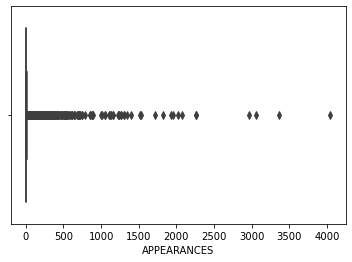

In [18]:
sns.boxplot(x=data['APPEARANCES'])